In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ann_result = pd.read_csv("results/ann_results.csv", index_col=0)
cnn_result = pd.read_csv("results/cnn_results.csv", index_col=0)
rnn_result = pd.read_csv("results/rnn_results.csv", index_col=0)
ann_tuning_result = pd.read_csv("results/ann_tuning_results_new.csv", index_col=0)
cnn_tuning_result = pd.read_csv("results/cnn_tuning_results_new.csv", index_col=0)
rnn_tuning_result = pd.read_csv("results/rnn_tuning_results_new.csv", index_col=0)

In [6]:
def plot_results(result):
    plt.plot([np.mean(result[result["cycle"]==i]["loss"]) for i in range(np.max(result["cycle"]) + 1)], linestyle="--", marker="o")
    plt.plot([np.median(result[result["cycle"]==i]["loss"]) for i in range(np.max(result["cycle"]) + 1)], linestyle="--", marker="o")
    plt.plot([np.max(result[result["cycle"]==i]["loss"]) for i in range(np.max(result["cycle"]) + 1)], linestyle="--", marker="o")
    plt.plot([np.min(result[result["cycle"]==i]["loss"]) for i in range(np.max(result["cycle"]) + 1)], linestyle="--", marker="o")
    plt.show()

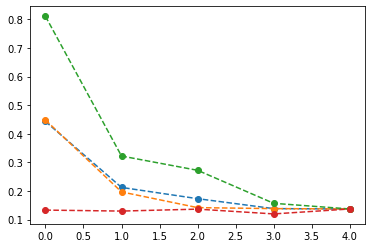

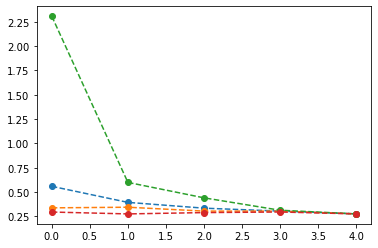

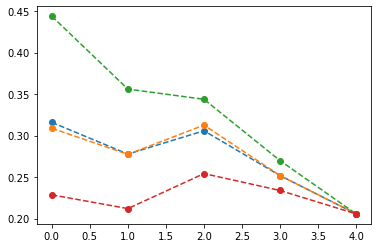

In [7]:
plot_results(ann_tuning_result)
plot_results(cnn_tuning_result)
plot_results(rnn_tuning_result)

In [18]:
def plot_hist(data):
    for i in range(4):
        to_plot = data[data["cycle"]==i]["loss"]
        plt.hist(to_plot, weights=np.ones_like(to_plot) / len(to_plot))
    plt.show()

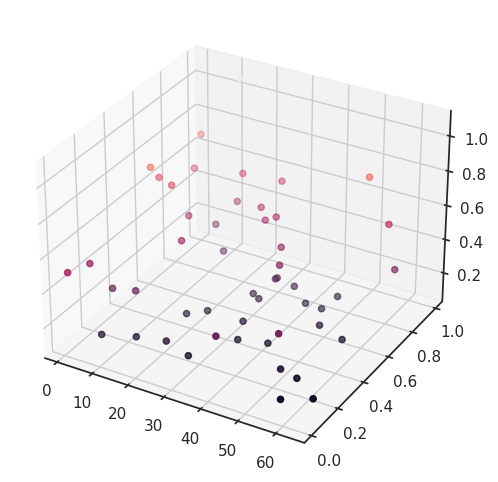

In [94]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(ann_result["num_units"], ann_result["dropout_rate"], ann_result["loss"], c=ann_result["loss"])
plt.show()

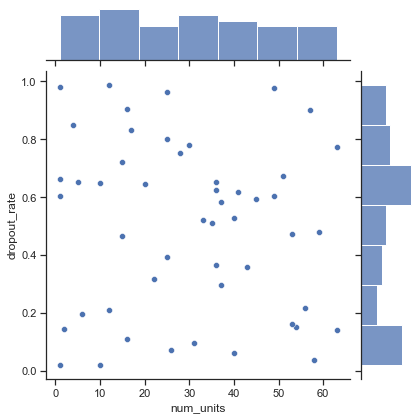

In [16]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.jointplot(x=ann_result["num_units"], y=ann_result["dropout_rate"]) # color="#4CB391"
# sns.histplot(x=ann_result["num_units"], y=ann_result["dropout_rate"], bins=4, pthresh=.1, cmap="Reds")
# sns.kdeplot(x=ann_result["num_units"], y=ann_result["dropout_rate"], levels=3, color="b", linewidths=1)
plt.show()

<Axes: xlabel='cycle', ylabel='loss'>

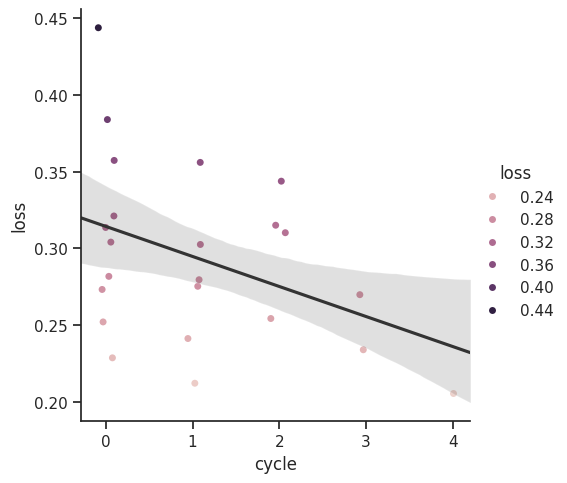

In [67]:
# sns.catplot(
#     data=rnn_tuning_result, x="cycle", y="loss", hue="loss",
#     native_scale=True, zorder=1
# )
# sns.regplot(
#     data=rnn_tuning_result, x="cycle", y="loss",
#     scatter=False, truncate=False, order=1, color=".2", ci=90
# )

In [50]:
# sns.set_theme(style="dark")

# # Load the example tips dataset
# tips = sns.load_dataset("tips")

In [51]:
# tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


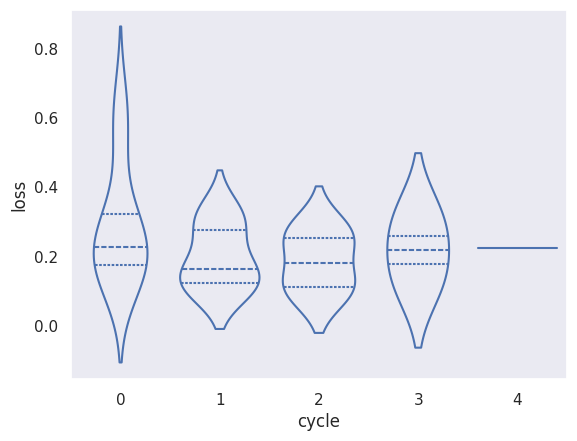

In [67]:
# sns.violinplot(data=ann_result, x="cycle", y="loss",
#                split=False, fill=False)
# plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not app

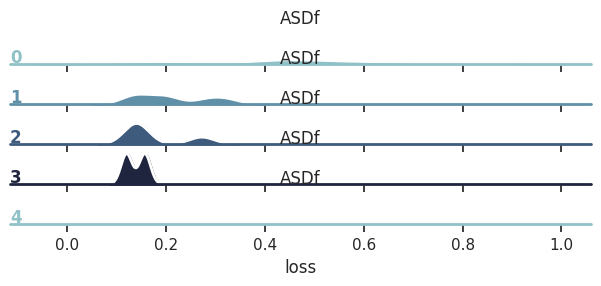

In [54]:
# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(4, rot=-.25, light=.7)
# g = sns.FacetGrid(ann_tuning_result, row="cycle", hue="cycle", aspect=15, height=.5, palette=pal)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "loss",
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)
# g.map(sns.kdeplot, "loss", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#   ax = plt.gca()
#   ax.text(0, .2, label, fontweight="bold", color=color,
#           ha="left", va="center", transform=ax.transAxes)

# g.map(label, "loss")
# g.figure.subplots_adjust(hspace=0.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)